In [1]:
from google.colab import files
uploaded = files.upload()


Saving student_dataset.xlsx to student_dataset.xlsx


In [3]:
import pandas as pd

df = pd.read_excel("student_dataset.xlsx")
print(df.head)

<bound method NDFrame.head of     Hours_Study  Hours_Sleep Result
0             5            7   Pass
1             1            5   Fail
2             3            6   Pass
3             2            4   Fail
4             4            8   Pass
5             6            5   Pass
6             1            3   Fail
7             7            6   Pass
8             8            7   Pass
9             2            4   Fail
10            5            6   Pass
11            9            8   Pass
12            4            7   Pass
13            3            5   Fail
14            6            6   Pass>


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Features and target

In [5]:
X = df[['Hours_Study', 'Hours_Sleep']]
y = df['Result']

Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Scaling

In [7]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

Training a model

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_s, y_train)

KNeighborsClassifier(n_neighbors=3)

Predict

In [9]:
y_pred = knn.predict(X_test_s)

Finding accuracy

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

Accuracy: 1.0


Confusion matrix

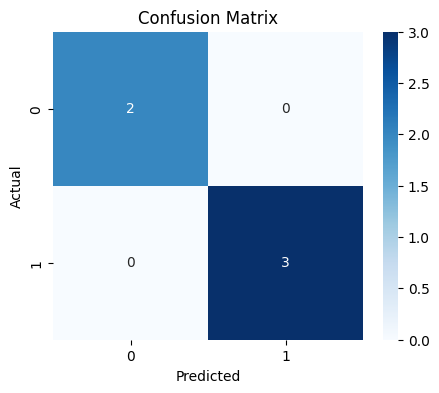

In [11]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix.png")
plt.show()

Saving confusion matrix

In [12]:
from google.colab import files
files.download("confusion_matrix.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save model and scaler with joblib

In [13]:
import joblib

joblib.dump(knn, "knn_model.joblib")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

Exporting notebooks and files